 <h1 style="text-align: center;" > Chapter 10. Planetary Rings </h1>

 <h2 style="text-align: center;" > Action by Diana C. Zapata. University of Antioquia </h2>

<p style="text-align: justify;"> In this notebook we will present part of the theoretical background of the chapter devoted to the <span style="color:blue;"><i>Planetary Ring Systems</i></span> of the book <span style="color:blue;"><i>Solar system dynamics</i></span> by Murray & Dermott. Some mathematical and numerical results of interest for the theory will also be included. 
    
This chapter presents properties of planetary rings that can be understood by adopting a fluid dynamic approach to the problem to illustrate the resonant phenomena of these systems. For details on the theory please refer directly to the book:

> Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.

In the repository you will find the file in PDF format corresponding to the sections of chapter 10 developed here. You will also find <span style="color:black;"><i>Appendix A</i></span> of the book, important for extracting data from the rings and satellites of the planets.</p>   


<h2> Importing libraries </h2>
<p> We will start by importing the necessary libraries to develop the code below.  
    
<p>The reader is reminded to install all necessary libraries before importing them. For example to install the Astroquery library:</p>


```python
!pip install -q astroquery
``` 

<p>
<ul>    
<li> For calculations and simple operations the following libraries will be used:</li>   
</ul> 
</p>

In [1]:
import numpy as np
from scipy.optimize import fsolve

<p>
<ul>    
<li>To make the graphics: </li>
</ul> 
</p>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<p>
<ul>    
<li> For the aesthetics  and interactivity of the graphics: </li>   
</ul> 
</p>

In [3]:
from matplotlib.font_manager import FontProperties
import matplotlib.cbook
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider
from ipywidgets import ToggleButtons
import warnings

<p>
<ul>    
<li> For handling constants: </li>   
</ul> 
</p> 

In [4]:
from astropy import constants as c

<p>
<ul>    
<li> To view the progress of the iterations: </li>   
</ul> 
</p>

In [5]:
from tqdm import tqdm

<p>
<ul>    
<li> To extract data from planets and satellites: </li>   
</ul> 
</p>

In [7]:
import spiceypy as spy
from astroquery.jplhorizons import Horizons

<p>
<ul>    
<li> For handling data with Dataframe: </li>   
</ul> 
</p>

In [8]:
import pandas as pd

<p></p>

<h2> Section 10.2: Planetary Ring Systems </h2>  

<p> In this section, we will develop the code to reproduce <i>Fig. 10.1</i>, which illustrates the different ring systems of the Solar System belonging to Jupiter, Saturn, Uranus and Neptune. This graph shows the radial locations of satellites orbiting close to the rings.   

Specific details on the ring data are taken from <span style="color:black;"><i>Appendix A</i></span>, which can be found in the Annexes section attached to the end of this notebook.</p> 

<h2> Data ring systems </h2> 



In [9]:
# Jupiter's ring system
halo = ['halo', 89400, 123000]
main = ['main', 123000, 128940]
gossamer = ['gossamer', 128940, 242000]

jupiter_ring_systems = pd.DataFrame([halo, main, gossamer],
                                    columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])

In [10]:
# Saturn's ring system
D_ring = ['D', 66900, 74658]
C_ring = ['C', 74658, 91975]
B_ring = ['B', 91975, 117507]
A_ring = ['A', 122340, 136780]
F_ring = ['F', 140219, 140269]
G_ring = ['G', 166000, 173200]
E_ring = ['E', 180000, 480000]

saturn_ring_systems = pd.DataFrame([D_ring, C_ring, B_ring, A_ring,
                                    F_ring, G_ring, E_ring],
                                   columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])

In [11]:
# Uranus's ring system
six_ring = ['6', 41837, 41852]
five_ring = ['5', 42334, 42236]
four_ring = ['4', 42571, 42573.5]
α_ring = ['α', 44718, 44725]
β_ring = ['β', 45661, 45669]
η_ring = ['η', 47176, 47177.6]
γ_ring = ['γ', 47627, 47629.5]
δ_ring = ['δ', 48300, 48305]
λ_ring = ['λ', 50024, 50026]
ε_ring = ['ε', 51149, 51265]

uranus_ring_systems = pd.DataFrame([six_ring, five_ring, four_ring,
                                    α_ring, β_ring, η_ring, γ_ring,
                                    δ_ring, λ_ring, ε_ring],
                                   columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])

In [12]:
# Neptune's ring system
galle = ['Galle', 42000, 44000]
le_verrier = ['Le Verrier', 53200, 53299]
lassell = ['Lassell', 53200, 57200]
adams = ['Adams', 62932.57, 62947.57]

neptune_ring_systems = pd.DataFrame([galle, le_verrier, lassell,adams],
                                    columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])

<p> We save the data corresponding to the inner and outer edges of the rings in variables:</p>

In [13]:
jupiter_inner_edge = np.array(jupiter_ring_systems['Inner Edge (km)'])
jupiter_outer_edge = np.array(jupiter_ring_systems['Outer Edge (km)'])

In [14]:
saturn_inner_edge = np.array(saturn_ring_systems['Inner Edge (km)'])
saturn_outer_edge = np.array(saturn_ring_systems['Outer Edge (km)'])

In [15]:
uranus_inner_edge = np.array(uranus_ring_systems['Inner Edge (km)'])
uranus_outer_edge = np.array(uranus_ring_systems['Outer Edge (km)'])

In [16]:
neptune_inner_edge = np.array(neptune_ring_systems['Inner Edge (km)'])
neptune_outer_edge = np.array(neptune_ring_systems['Outer Edge (km)'])

<p>Now we need the data on the radius and mass of the planets, as well as the semi-major axis of their satellites. This data is available in the "<span style="color:black;font-weight:bold;">data</span>" folder, which is hosted in the repository and was extracted from <a href="https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/" style="color:blue;text-decoration:underline;">https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/</a>.

The specific files we will be using are <i>"pck00011.tpc"</i> and <i>"gm_de431.tpc"</i>. 

You can check the <b>id</b> of each body in the annex attached at the end of this notebook.

<p> We define some constants that we will need shortly:</p>

In [17]:
au = c.au.to('km') # Astronomical units
days = 86400       # Seconds
G = c.G.value      # Gravitational constant

<h2> Data planets </h2> 

<p>
Jupiter, Saturn, Uranus, Neptune:
</p>

In [18]:
planets = ['599','699','799','899']

<h3> Radii </h3> 

In [19]:
spy.furnsh('data/pck00011.tpc')

In [20]:
radius = np.array([None]*len(planets))

for i in range (len(planets)):
    n, radius[i] = spy.bodvrd(planets[i], 'RADII', 3) 

<p>Thus we obtain the variables that contain the data of the radii of the planets (in <i>km</i>):</p>

In [21]:
jupiter_radius = radius[0].mean()
saturn_radius = radius[1].mean()
uranus_radius = radius[2].mean()
neptune_radius = radius[3].mean()

In [22]:
jupiter_radius, saturn_radius, uranus_radius, neptune_radius

(69946.0, 58300.0, 25363.666666666668, 24623.0)

<h3> Mass (GM) </h3> 

In [23]:
spy.furnsh('data/gm_de431.tpc') 

<p>Thus we obtain the variable that contain the <i>GM</i> factor of the planets (in $km^3/s^2$):</p>

In [24]:
masses_GM = np.array([None]*len(planets))

for i in range(len(masses_GM)):
    n = i+5
    n = str(n)
    masses_GM[i] = spy.bodvrd(n, 'GM', 1)[1]

In [25]:
masses_GM

array([array([1.26712765e+08]), array([37940585.2]),
       array([5794548.60000001]), array([6836527.10058002])], dtype=object)

<h2> Data satellites </h2> 

<p> Metis, Adrastea, Amalthea,Thebe: </p> 

In [26]:
jupiter_satellites = ['516', '515', '505', '514']

<p> Pan, Atlas, Prometheus, Pandora, Epimetheus, Janus, Mimas, Enceladus, Tethys: </p> 

In [27]:
saturn_satellites = ['618', '615', '616', '617', '611', '610', '601', '602', '603']

<p> Cordelia, Ophelia, Bianca, Cressida, Desdemona, Juliet, Portia, Rosalind, Belinda, Puck: </p> 

In [28]:
uranus_satellites = ['706', '707', '708', '709', '710', '711', '712', '713', '714', '715', '705']

<p> Naiad, Thalassa, Despina, Galatea, Larissa, Proteus: </p> 

In [29]:
neptune_satellites = ['803', '804', '805', '806', '807', '808']

In [30]:
jupiter_names = ['M', 'Ad', 'Am', 'T']
saturn_names = ['Pan', 'A', 'Pr', 'Pd', 'Ep', 'J', 'M', 'E', 'T']
uranus_names = ['Co', 'O', 'Bi', 'Cr', 'D', 'J', 'Po', 'R', 'Be', 'Pu', 'M']
neptune_names = ['N', 'T', 'D', 'G', 'L', 'P']

<h3> Semi-major axis  </h3>  

In [31]:
jupiter_axes = np.array([None]*len(jupiter_satellites))
saturn_axes = np.array([None]*len(saturn_satellites))
uranus_axes = np.array([None]*len(uranus_satellites))
neptune_axes = np.array([None]*len(neptune_satellites))

<p>We will use the <i>Horizons</i> class from the <i>astroquery.jplhorizons</i> package to interact with the <i>JPL HORIZONS</i> database and thus obtain the semi-major axes of the satellites: </p>

In [32]:
for i in tqdm(range(len(jupiter_axes))):
    jupiter_axes[i] = Horizons(id = jupiter_satellites[i], 
                               location='@599').elements()['a'][0]*au
    
for i in tqdm(range(len(saturn_axes))):
    saturn_axes[i] = Horizons(id = saturn_satellites[i], 
                              location='@699').elements()['a'][0]*au
    
for i in tqdm(range(len(uranus_axes))):
    uranus_axes[i] = Horizons(id = uranus_satellites[i], 
                              location='@799').elements()['a'][0]*au
    
for i in tqdm(range(len(neptune_axes))):
    neptune_axes[i] = Horizons(id = neptune_satellites[i], 
                               location='@899').elements()['a'][0]*au 

100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.60it/s]


<p> With all the necessary information at our fingertips, we can make the desired graph: </p>

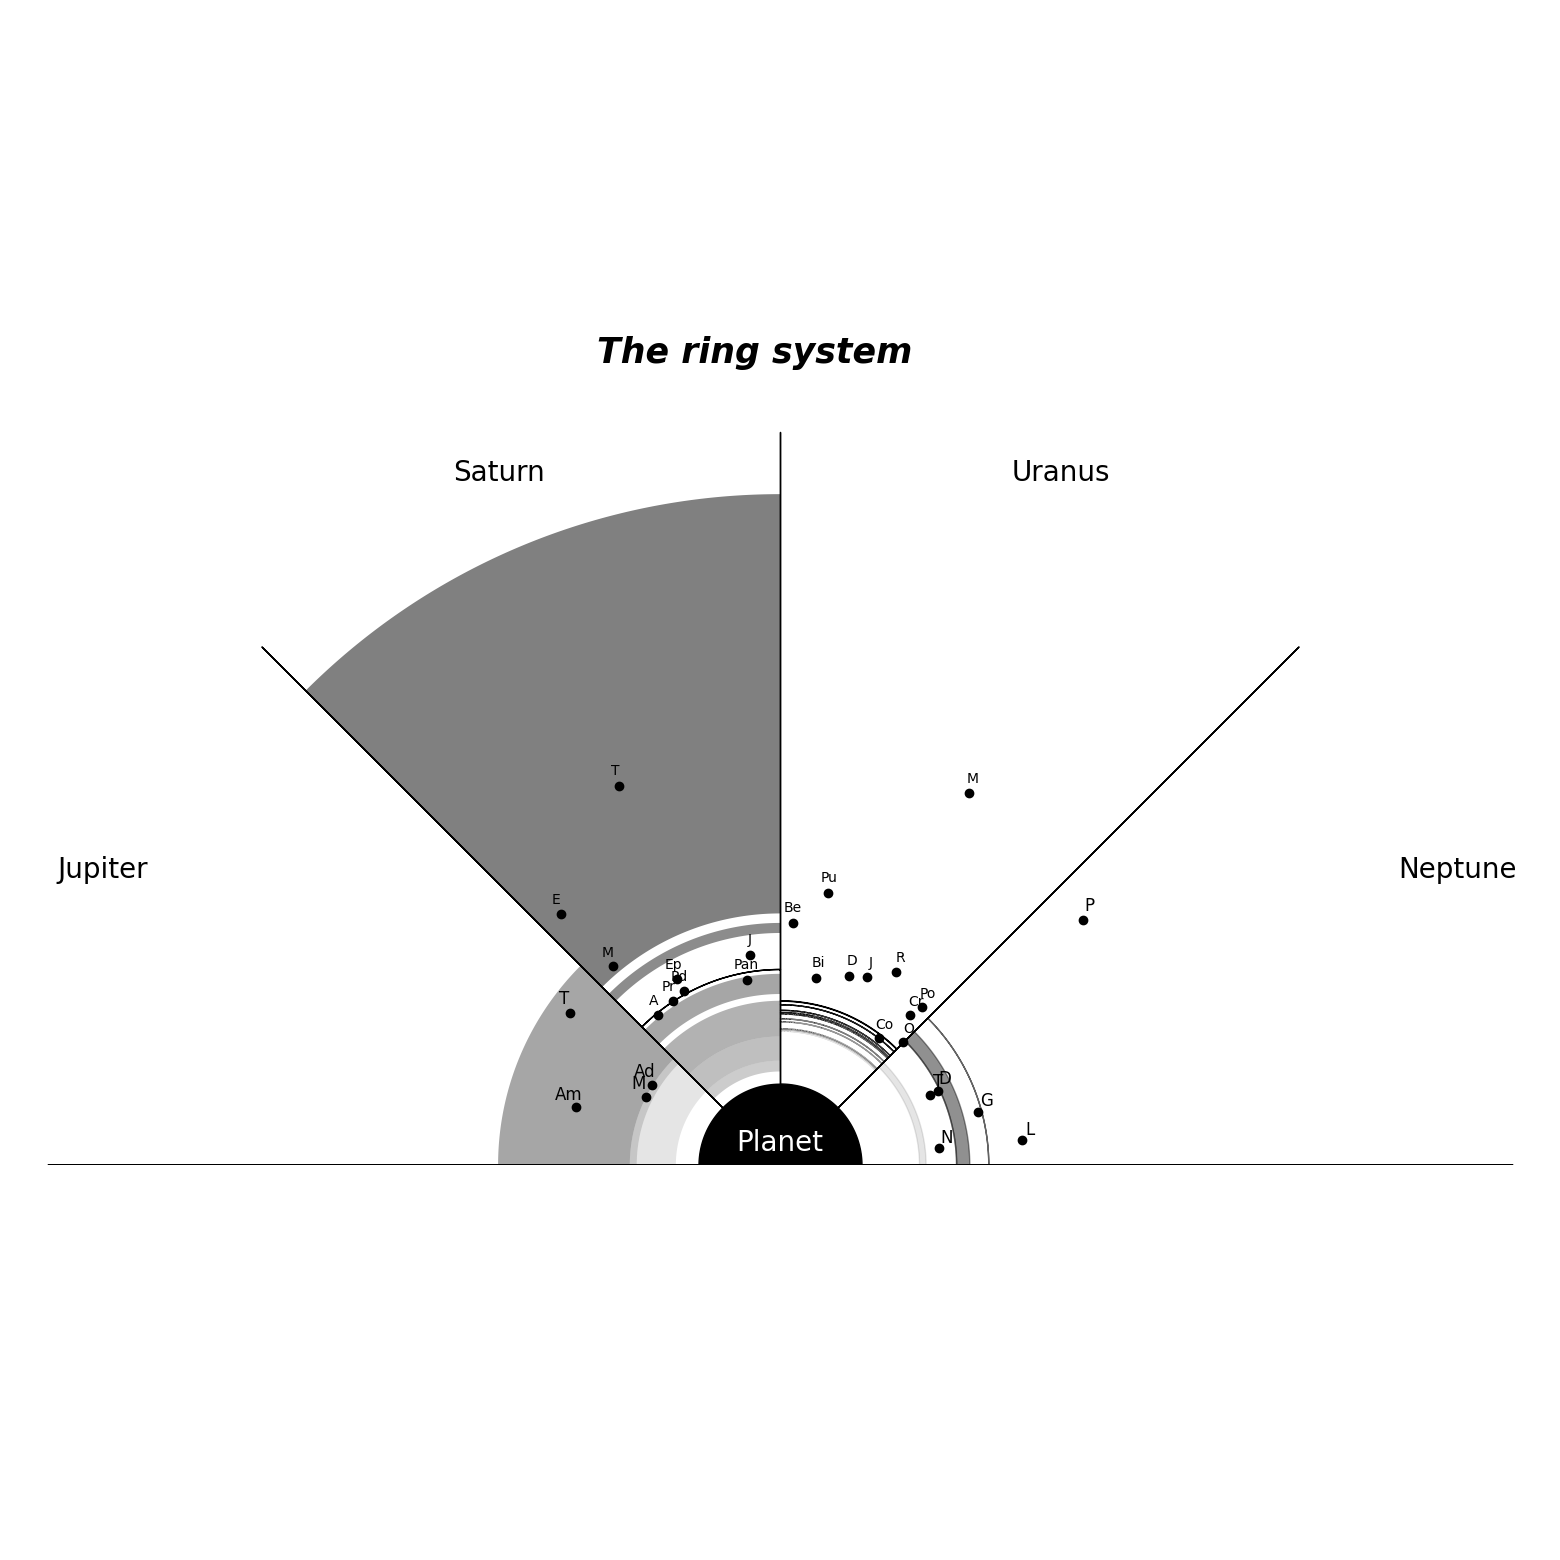

In [35]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar = True)

font = FontProperties(style='italic', weight='bold', size='x-large')
fig.text(0.5, 0.7, 'The ring system', fontproperties = font, fontsize = 25,
          ha='center', va='bottom')

# Plot of Jupiter
theta = np.linspace(3 * np.pi/4,np.pi, 100)

ax.fill_between(theta, 0, jupiter_radius/jupiter_radius, color = 'black' )

ax.annotate('Jupiter', xy=(0,0), xytext=(157.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')


# Ring system
alpha = 0.1
for i in range(len(jupiter_inner_edge)):
    ax.fill_between(theta, jupiter_inner_edge[i]/jupiter_radius, 
                    jupiter_outer_edge[i]/jupiter_radius, facecolor = 'black', alpha = alpha)
    alpha += 1/8
    
# Plot satellites
for i in range(len(jupiter_axes)):
    theta = np.random.randint(low = 135, high = 180)*np.pi/180
    ax.plot(theta,jupiter_axes[i]/jupiter_radius,"o",color='black', markersize=6)
    ax.annotate(jupiter_names[i], xy=(0,0), xytext=(theta,(jupiter_axes[i].value/jupiter_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 12,
                textcoords='data')
    
    
    
# Plot of Saturn
theta = np.linspace(np.pi/2, 3 * np.pi/4, 100)

ax.fill_between(theta, 0, saturn_radius/saturn_radius, facecolor = 'black')

ax.annotate('Saturn', xy=(0,0), xytext=(112.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')

# Ring system
alpha = 0.2
for i in range(len(saturn_inner_edge)):
    ax.fill_between(theta, saturn_inner_edge[i]/saturn_radius, 
                    saturn_outer_edge[i]/saturn_radius, facecolor = 'black', alpha = alpha)
    alpha += 1/20
    
ax.fill_between(theta, saturn_inner_edge[4]/saturn_radius, 
                    saturn_outer_edge[4]/saturn_radius, color = 'black', alpha = 1)

# Plot satellites
for i in range(len(saturn_axes)):
    theta = np.random.randint(low = 90, high = 135)*np.pi/180
    ax.plot(theta,saturn_axes[i]/saturn_radius,"o",color='black', markersize=6)
    ax.annotate(saturn_names[i], xy=(0,0), xytext=(theta,(saturn_axes[i].value/saturn_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 10,
                textcoords='data')
    
    
    
# Plot of Uranus
theta = np.linspace(np.pi/2, np.pi/4, 100)

ax.fill_between(theta, 0, uranus_radius/uranus_radius, color = 'black')

ax.annotate('Uranus', xy=(0,0), xytext=(67.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')

# Ring system
alpha = 0.1
for i in range(len(uranus_inner_edge)):
    ax.fill_between(theta, uranus_inner_edge[i]/uranus_radius, 
                    uranus_outer_edge[i]/uranus_radius, color = 'black', alpha = alpha)
    alpha += 1/10
    
# Plot satellites
for i in range(len(uranus_axes)):
    theta = np.random.randint(low = 45, high = 90)*np.pi/180
    ax.plot(theta,uranus_axes[i]/uranus_radius,"o",color='black', markersize=6)
    ax.annotate(uranus_names[i], xy=(0,0), xytext=(theta,(uranus_axes[i].value/uranus_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 10,
                textcoords='data')

    
    
# Plot of Neptune
theta = np.linspace(0, np.pi/4, 100)

ax.fill_between(theta, 0, neptune_radius/neptune_radius, color = 'black')

ax.annotate('Neptune', xy=(0,0), xytext=(22.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')

# Ring system
alpha = 0.1
for i in range(len(neptune_inner_edge)):
    ax.fill_between(theta, neptune_inner_edge[i]/neptune_radius, 
                    neptune_outer_edge[i]/neptune_radius, color = 'black', alpha = alpha)
    alpha += 1/6
    
# Plot satellites
for i in range(len(neptune_axes)):
    theta = np.random.randint(low = 0, high = 45)*np.pi/180
    ax.plot(theta,neptune_axes[i]/neptune_radius,"o",color='black', markersize=6)    
    ax.annotate(neptune_names[i], xy=(0,0), xytext=(theta,(neptune_axes[i].value/neptune_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 12,
                textcoords='data')
    
    
    
for i in [0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi]:
    r = np.linspace(0,9)
    ax.fill_between(i, r, color = 'black') 
    
ax.annotate('Planet', xy=(0,0), xytext=(np.pi/2,0.1), ha='center', va='bottom', color = 'white', fontsize = 20,
            textcoords='data')
              
ax.set_thetamin(0)
ax.set_thetamax(180)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')

plt.show()

 <h3> Section 10.2.1: The Rings of Jupiter </h3>  
 
 <p> In this section the book mentions the following: " <a href="#(Consolmagno et al. 1983)">Consolmagno (1983) </a> and <a href="#(Burns et al. 1985)">Burns et al. (1985) </a> suggested that the Lorentz force experienced by a charged dust grain could help explain some of the structure of the jovian ring system. In particular, commensurate relationships between the orbital period of the grain and the period of the electromagnetic force give rise to the so-called <b>Lorentz resonances</b> <a href="#(Burns et al. 1985)">Burns et al. (1985) </a>"</p>  

<h3> Lorentz Resonances </h3>  

<p> Lorentz resonances are a type of orbital resonance that occurs when an external force is applied to a system that oscillates with a particular frequency.  
    
In the context of celestial bodies, Lorentz resonances can occur when, for example, a planet's magnetic field interacts with charged particles in the medium.  
    
Lorentz resonances occur at semi-major axes given by <b> (Eq. 10.1)</b> :  


$$a_k = \Big(\frac{k\mp 1}{k}\Big)^{2/3}r_s$$  


Where $r_s$ is the synchronous orbital radius, which, in the case of Jupiter is $2.2444R_♃$ if the effects of the higher-order gravitational moments are included. <a href="#(Burns et al. 1985)">(Burns et al. 1985) </a> 


Lorentz resonances in Jupiter's rings affect the moons Metis and Adrastea, which orbit just inside the planet's main ring system. These moons are believed to be the source of some of the ring material, and their orbits are influenced by the same magnetic field that causes the Lorentz resonance.

The orbits of Metis and Adrastea are in <i>1:2</i> orbital resonance with the ring particles (they complete one orbit around Jupiter for every two orbits around the ring particles). This resonance has a destabilizing effect on the moons' orbits, causing them to spiral toward Jupiter over time.

However, the Lorentz resonance provides a stabilizing effect that helps to counteract this destabilization.
The resonance causes the ring particles to accumulate in certain regions of space, which in turn makes the gravitational pull on the moons more regular and predictable. Without Lorentz resonances the orbits of Metis and Adrastea would probably be much more chaotic and unstable.  

Next, we will see graphically where the Lorentz resonances occur in the Jovian system:</p>

In [36]:
rs = 2.2444*jupiter_radius

In [37]:
ak_int = np.array([None]*20) # internal resonances 
ak_ext = np.array([None]*20) # external resonances

for i in range(len(ak_int)):
    k = i+1
    ak_int[i] = ((k-1)/k)**(2/3) * rs
    
    k = -k
    ak_ext[i] = ((k-1)/k)**(2/3) * rs

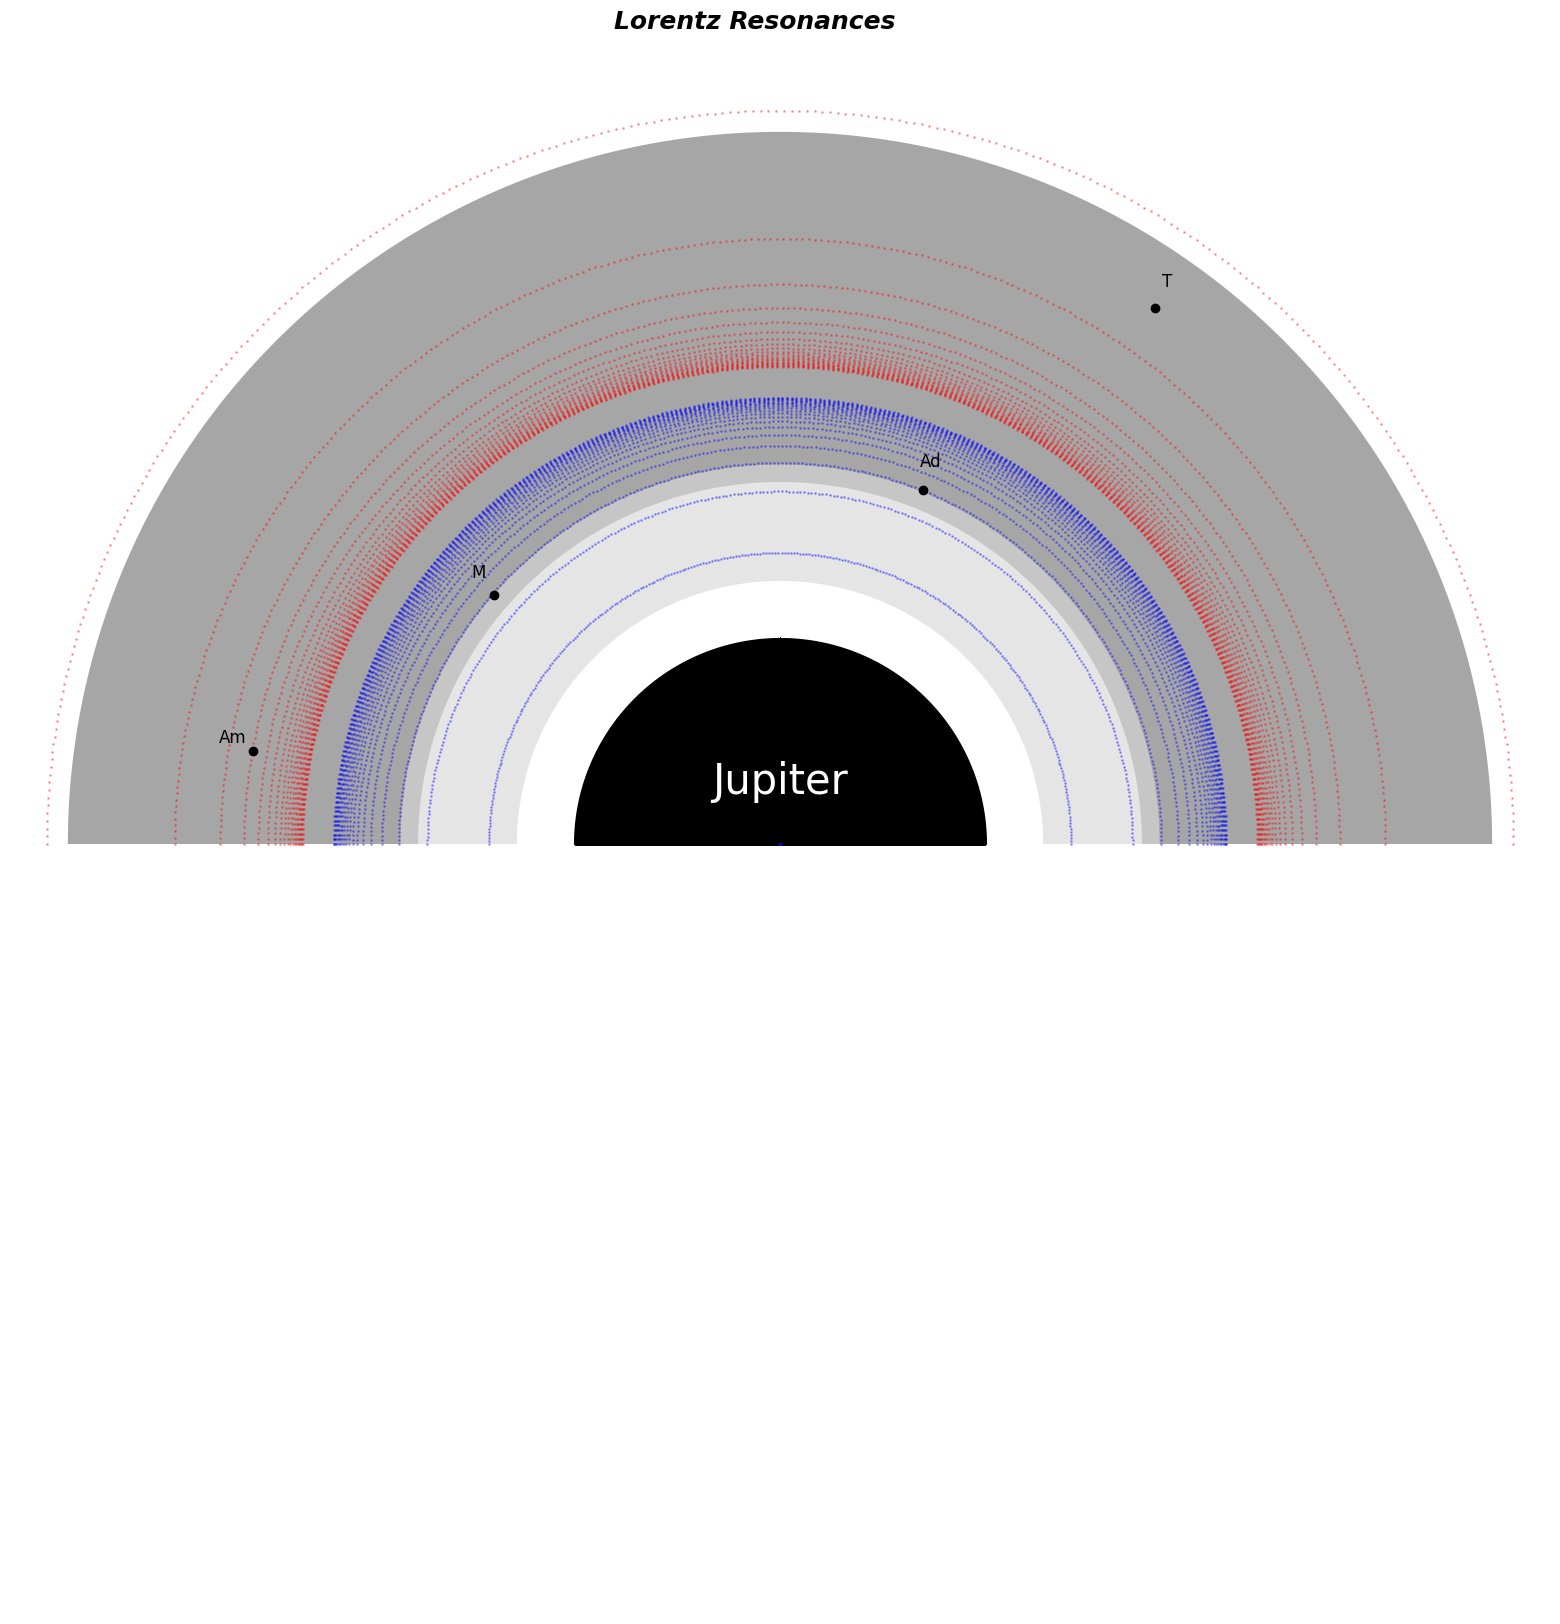

In [38]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar = True)

font = FontProperties(style='italic', weight='bold', size='x-large')
fig.text(0.5, 0.9, 'Lorentz Resonances', fontproperties = font, fontsize = 18,
          ha='center', va='bottom')

ax.annotate('Jupiter', xy=(0,0), xytext=(np.pi/2,0.2), ha='center', va='bottom', color = 'white', fontsize = 30,
            textcoords='data')

# Plot of Jupiter
theta = np.linspace(0, np.pi, 300)

ax.fill_between(theta, 0, jupiter_radius/jupiter_radius, color = 'black' )

# Ring system
alpha = 0.1
for i in range(len(jupiter_inner_edge)):
    ax.fill_between(theta, jupiter_inner_edge[i]/jupiter_radius, 
                    jupiter_outer_edge[i]/jupiter_radius, facecolor = 'black', alpha = alpha)
    alpha += 1/8
  

# Plot Lorentz resonance
for i in range (len(theta)):
    for j in range(len(ak_int)):
        ax.plot(theta[i],ak_int[j]/jupiter_radius, 'o', color = 'blue', 
                alpha = 0.3, markersize = 1)
        ax.plot(theta[i],ak_ext[j]/jupiter_radius, 'o', color = 'red', 
                alpha = 0.3, markersize = 1)
               
# Plot satellites
for i in range(len(jupiter_axes)):
    theta = np.random.randint(low = 0, high = 180)*np.pi/180
    ax.plot(theta,jupiter_axes[i]/jupiter_radius,"o",color='black', markersize=6)
    ax.annotate(jupiter_names[i], xy=(0,0), xytext=(theta,(jupiter_axes[i].value/jupiter_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 12,
                textcoords='data')


ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')

plt.show()

<p> In the graph above you can see what we call the interior Lorentz resonances (blue), and the exterior Lorentz resonances (red).  

Lorentz resonances may be important in explaining the shape of Jupiter's rings because they alter the distribution of mass in the rings and their structure.  
Thus, the main ring seems to be bounded by the Lorentz resonances $k=2$ and $k=3$   

Likewise, the gossamer ring begins to disappear near the Lorentz resonance $k=-1$. Perhaps the outward-evolving particles scatter vertically when approaching this resonance, making the already diffuse ring indistinguishable from the background. 

Lorentz resonances are much less important for Saturn's rings than for those of Jupiter because their strengths are substantially lower. Saturn's magnetic field is weaker as well as more regular than Jupiter's. In addition, saturnian ring particles are usually much larger and charges smalle so that charge-to-mass ratios are low. Furthermore, in the main ring system, optical depths are high so that our calculations, which ignore collisions, are moot. <a href="#(Burns et al. 1985)">(Burns et al. 1985) </a>  </p>  

<h2> Section 10.3: Resonances in Rings</h2>   

<p> Planetary rings exhibit a wide variety of characteristics, such as their location close to the Roche zone of the planets, variations in their thickness and brightness, the presence of gaps, sharp edges, waves, traces, radii, clumps, arcs, and curvatures. Many of these structural features are believed to be the result of satellite-induced gravitational resonances. To understand the characteristics and effects of these resonances, it is necessary to identify all the frequencies involved in the movement of the moons. <a href="#(Tiscareno et al. 2018)">(Tiscareno et al. 2018) </a>

In section 6 of the book, they explain to us that satellites revolve oblate planets in elliptical orbits (with the eccentricity of these ellipses being usually very small); three frequencies arise from this sort of motion <b>(Eqs. 6.244–6.246)</b>: </p>  

$$n = \Big(\frac{Gm_p}{a^3}\Big[1+\frac{3}{2}J_2\Big(\frac{R_p}{a}\Big)^2-\frac{15}{8}J_4\Big(\frac{R_p}{a}\Big)^4\Big]\Big)^{1/2} \quad \text{Mean motion}$$    

$$\kappa = \Big(\frac{Gm_p}{a^3}\Big[1-\frac{3}{2}J_2\Big(\frac{R_p}{a}\Big)^2+\frac{45}{8}J_4\Big(\frac{R_p}{a}\Big)^4\Big]\Big)^{1/2} \quad \text{Epicyclic frequency} $$    

$$\nu = \Big(\frac{Gm_p}{a^3}\Big[1+\frac{9}{2}J_2\Big(\frac{R_p}{a}\Big)^2-\frac{75}{8}J_4\Big(\frac{R_p}{a}\Big)^4\Big]\Big)^{1/2} \quad \text{Vertical frequency}$$  

<p> where $m_p$ is the mass of the planet, $a$ the semi-major axis of the satellite, and $J_2$ and $J_4$ the gravitational moments of order zero and second order, respectively.


Then, these three frequencies are those of the movement of particles subjected to the gravitational field of a planet with an axisymmetric potential described in terms of $J_s$
But, what are the $J_s$?</p>




<div style="border: 4px solid black; padding: 20px;">   
    
<h4 style="text-align: center;"> Gravitational moments $J_2$ and $J_4$:</h4>   
  
<p> The gravitational moments of a planet are a series of numerical coefficients that tell us how mass is distributed on the planet and how that mass affects gravity in different parts of the planet.

<ul>
    
<li> Moment of gravitational order zero $(J_2)$: This coefficient describes the general shape of the celestial object and its flattening at the poles. It refers to the deviation of the planet's shape from a perfect sphere. A high value of $J_2$ indicates that the object is more flattened at the poles and wider at the equator.</li>
<li> Moment of gravitational second order $(J_4)$: This coefficient describes the distribution of mass of the celestial object in terms of its density. The value of $J_4$ is related to how mass is distributed around the planet's poles.</li>
    
</ul> 

</p>

<img src="images/gravity_moments.png" width="600" />

</div>

<p> Below are the gravitational moments of some of the planets of the solar system which were extracted from: <a href="https://ssd.jpl.nasa.gov/tools/gravity.html#/outerplanets" >https://ssd.jpl.nasa.gov/tools/gravity.html#/outer planets</a>.</p>

In [39]:
data_jupiter = ['Jupiter', 14696.5, -586.6]
data_saturn = ['Saturn', 16290.6, -935.1]
data_uranus = ['Uranus', 3510.7, -34.2]
data_neptune = ['Neptune', 3536.3, -36]

gravitational_moment = pd.DataFrame([data_jupiter, data_saturn, data_uranus, data_neptune],
                                    columns = ['Ring system', 'J₂ ( x10⁻⁶ )','J₄ ( x10⁻⁶ )'])

In [40]:
gravitational_moment

,Ring system,J₂ ( x10⁻⁶ ),J₄ ( x10⁻⁶ )
0,Jupiter,14696.5,-586.6
1,Saturn,16290.6,-935.1
2,Uranus,3510.7,-34.2
3,Neptune,3536.3,-36.0


<p> Next we will carry out an experiment where we will show the trajectory of a particle that orbits around Saturn and is subject to frequencies $n, \kappa$ and $\nu$.  
    
We will use as canonical units: mass and radius of Saturn. </p>

In [41]:
# Canonical units:

UM = masses_GM[1][0]*1e9/G # mass
UL = saturn_radius*1e3     # length
UT = (UL**3/(G*UM))**0.5   # time
G_U = G*UM*UT**2/(UL**3)   # constant G

In [42]:
UM, UL, UT, G_U

(5.684578937117002e+26, 58300000.0, 2285.3399917648912, 1.0)

<p> We will take the orbit of a particle that is in the middle of ring A:</p>

In [43]:
a = 2.1
e = 0.1
inc = 10*np.pi/180

<p> And so that the effect of the frequencies is noticeable, we will exaggerate the value of $J_2$ and we will despise the $J_4$:</p>

In [44]:
J2 = np.array(gravitational_moment['J₂ ( x10⁻⁶ )'])*1e-6
J4 = 0
J2 = J2[1]*100

In [45]:
n = np.sqrt(((G_U)*1/a**3)*(1 + 1.5*J2*(1/a)**2))
k = np.sqrt(((G_U)*1/a**3)*(1 - 1.5*J2*(1/a)**2))
v = np.sqrt(((G_U)*1/a**3)*(1 + 4.5*J2*(1/a)**2))

In [46]:
n,k,v

(0.4096479852891446, 0.21942636072590235, 0.5361669664586737)

<p> To draw the orbit of the particle, we use the equations given in section 6 of the book:</p>  

$$\epsilon = e\cos(\kappa t) \quad \text{(6.235)}$$  

$$\alpha = -\frac{D}{A+F}+I\cos{(\nu t + \delta)} \quad \text{(6.237)}$$ 

$$\phi=A^{\frac{1}{2}}t-(2A^{\frac{1}{2}}/\kappa)e\sin{(\kappa t)} \quad \text{(6.239)}$$

<p> Here $r = a (1+\epsilon)$, $A = h^2/a^2$ and we will take $D$ and $\delta$ to be zero.

<p> Given $r$, $\alpha$ and $\phi$ we can find the position of the particle: </p> 

$$x = r\cos\alpha\cos\phi$$
$$y = r\cos\alpha\sin\phi$$
$$z = r\sin\alpha$$

In [47]:
P = 2*np.pi/n
t = np.linspace(0,5*P)

In [48]:
epsilon = e*np.cos(k*t)
r = a*(1 + epsilon)

In [49]:
p = a*(1 - e**2)
mu = 1
h = (p*mu)**0.5
A = h**2 / a**4
alpha = inc*np.cos(v*t)

In [50]:
phi = A**0.5*t - (2*A**0.5/k)*e*np.sin(k*t)

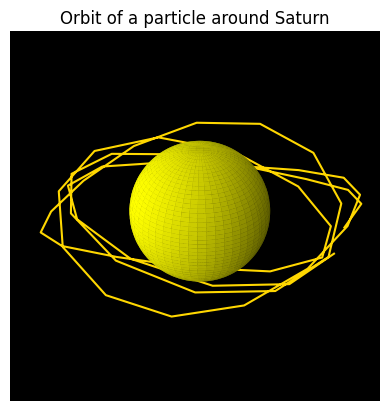

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = r * np.cos(alpha) * np.cos(phi)
y = r * np.cos(alpha) * np.sin(phi)
z = r * np.sin(alpha)
ax.plot(x,y,z, color = 'gold')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color = 'yellow')
 
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)
ax.set_box_aspect([1,1,1])
ax.set_facecolor('black')
ax.set_title('Orbit of a particle around Saturn')
plt.axis("off")
plt.show()

<h4> Pattern speed $(\Omega_p)$ :</h4>   

<p> So we see that when considering the gravitational effect of a disturbing satellite, this satellite will have its own set of frequencies $n'$, $k'$ y $v'$.  
    
When a satellite is disturbing a particle in the ring system, the perturbation caused by the satellite is oscillatory, and the perturbing function can be written as a very complex Fourier series <b>(Eq. 6.107)</b>:
</p>


\begin{equation*}
\begin{aligned}
\mathcal{R}_{\mathrm{D}}= & \,\left(\frac{1}{2} b_{\frac{1}{2}}^{(j)}+\frac{1}{8}\left(e^2+e^{\prime 2}\right)\left[-4 j^2+2 \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j)}\right. \\
& \left.+\frac{1}{4}\left(s^2+s^{\prime 2}\right)\left([-\alpha] b_{\frac{3}{2}}^{(j-1)}+[-\alpha] b_{\frac{3}{2}}^{(j+1)}\right)\right) \\
& \times \cos \left[j \lambda^{\prime}-j \lambda\right] \\
+ & \left(\frac{1}{4} e e^{\prime}\left[2+6 j+4 j^2-2 \alpha D-\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j+1)}\right) \\
& \times \cos \left[j \lambda^{\prime}-j \lambda+\varpi^{\prime}-\varpi\right] \\
+ & \left(s s^{\prime}[\alpha] b_{\frac{3}{2}}^{(j+1)}\right) \cos \left[j \lambda^{\prime}-j \lambda+\Omega^{\prime}-\Omega\right] \\
+ & \left(\frac{1}{2} e[-2 j-\alpha D] b_{\frac{1}{2}}^{(j)}\right) \cos \left[j \lambda^{\prime}+(1-j) \lambda-\varpi\right] \\
+ & \left(\frac{1}{2} e^{\prime}[-1+2 j+\alpha D] b_{\frac{1}{2}}^{(j-1)}\right) \cos \left[j \lambda^{\prime}+(1-j) \lambda-\varpi^{\prime}\right] \\
+ & \left(\frac{1}{8} e^2\left[-5 j+4 j^2-2 \alpha D+4 j \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \varpi\right] \\
+ & \left(\frac{1}{4} e e^{\prime}\left[-2+6 j-4 j^2+2 \alpha D-4 j \alpha D-\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j-1)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-\varpi^{\prime}-\varpi\right] \\
+ & \left(\frac{1}{8} e^{\prime 2}\left[2-7 j+4 j^2-2 \alpha D+4 j \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j-2)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \varpi^{\prime}\right] \\
+ & \left(\frac{1}{2} s^2[\alpha] b_{\frac{3}{2}}^{(j-1)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \Omega\right] \\
+ & \left(s s^{\prime}[-\alpha] b_{\frac{3}{2}}^{(j-1)}\right) \cos \left[j \lambda^{\prime}+(2-j) \lambda-\Omega^{\prime}-\Omega\right] \\
+ & \left(\frac{1}{2} s^{\prime 2}[\alpha] b_{\frac{3}{2}}^{(j-1)}\right) \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \Omega^{\prime}\right]
\end{aligned}
\end{equation*}

<p>For each term in this series, it is possible to find a frequency at which the term becomes constant, and this is what we refer to as the <strong>pattern speed</strong>.  

This will depend on the exact combination of frequencies under consideration and may be written as <b>(Eq. 10.2)</b>:
    
$$m\Omega_p = mn' + k\kappa' + p\nu' $$     

Where $m$, $k$, and $p$ are integers with $m$ non-negative. Thus, the pattern speed can take infinitely many values, as shown in the following interactive graph. </p>  

In [52]:
def resonance(a,mp,Rp,J2,J4,M,K,P):
    
    n = np.sqrt((G*mp/a**3)*(1 + 1.5*J2*(Rp/a)**2 - 1.875*J4*(Rp/a)**4))
    k = np.sqrt((G*mp/a**3)*(1 - 1.5*J2*(Rp/a)**2 + 5.625*J4*(Rp/a)**4))
    v = np.sqrt((G*mp/a**3)*(1 + 4.5*J2*(Rp/a)**2 - 9.375*J4*(Rp/a)**4))
    
    return (M*n + K*k + P*v)/M

In [54]:
def interactive_plot(M, K, P, mp_value):
    
    mp = mp_value
    
    J2 = np.array(gravitational_moment['J₂ ( x10⁻⁶ )'])*1e-6
    J4 = np.array(gravitational_moment['J₄ ( x10⁻⁶ )'])*1e-6
    
    if mp == masses_GM[0]*1e9/G:
        a = np.linspace(jupiter_inner_edge[0]*1e3,jupiter_outer_edge[-1]*1e3)
        Rp = jupiter_radius*1e3
        J2 = J2[0]
        J4 = J4[0]
        plt.xlabel('R♃')
        plt.ylim(0,0.009)
        
    elif mp == masses_GM[1]*1e9/G:
        a = np.linspace(saturn_inner_edge[0]*1e3,saturn_outer_edge[-1]*1e3)
        Rp = saturn_radius*1e3
        J2 = J2[1]
        J4 = J4[1]
        plt.xlabel('R♄')
        plt.ylim(0,0.008)
        
    elif mp == masses_GM[2]*1e9/G:
        a = np.linspace(uranus_inner_edge[0]*1e3,uranus_outer_edge[-1]*1e3)
        Rp = uranus_radius*1e3
        J2 = J2[2]
        J4 = J4[2]
        plt.xlabel('R♅')
        plt.ylim(0,0.006)
        
    elif mp == masses_GM[3]*1e9/G:
        a = np.linspace(neptune_inner_edge[0]*1e3,neptune_outer_edge[-1]*1e3)
        Rp = neptune_radius*1e3
        J2 = J2[3]
        J4 = J4[3]
        plt.xlabel('R♆')
        plt.ylim(0,0.0065)
        
    v = resonance(a,mp,Rp,J2,J4,M,K,P)
    
    plt.plot(a/Rp, v, color = 'purple')
    plt.title("$\Omega_P$ (1/s)")
    plt.show()

In [55]:
mp_options = [('Jupiter', masses_GM[0]*1e9/G), 
              ('Saturn', masses_GM[1]*1e9/G), 
              ('Uranus', masses_GM[2]*1e9/G), 
              ('Neptune', masses_GM[3]*1e9/G)]

In [56]:
widget_M = FloatSlider(value=1, min=1, max=10, step=1, description='$m$')
widget_K = FloatSlider(value=1, min=0, max=10, step=1, description='$k$')
widget_P = FloatSlider(value=1, min=0, max=10, step=1, description='$p$')
widget_mp = ToggleButtons(options=mp_options, description=' ', button_style='info')

In [57]:
interact(interactive_plot, M=widget_M, K=widget_K, P=widget_P, mp_value=widget_mp)

interactive(children=(FloatSlider(value=1.0, description='$m$', max=10.0, min=1.0, step=1.0), FloatSlider(valu…

<function __main__.interactive_plot(M, K, P, mp_value)>

<h3> Section 10.3.1: Perturbations in Semi-major Axis and Corotation Resonances </h3>    

<p>
There is a $\Omega_p$  that produces the maximum disturbance of the satellite over the particles of the ring <b>(Eq. 10.4)</b>:  
    
$$m(n-\Omega_p)=0 $$  
    
Taking as an example $m = 2, k = 1$ y  $p = 0$, the term of the perturbing function that becomes stationary is the one with:  
    
$$j = m + k + p = 2+1+0 =  3$$ 
    
This configuration is known as a 3:2 corotation resonance.
    
Next, we proceed to develop the code to arrive at <span style="color:black;"><i>Fig. 10.7.</i></span>  which represents the 3:2 corotation resonance. 
    
    
First we create a function that determines the radial distance between the satellite and the planet:
    
</p>

In [58]:
def r(a, e, t):
    return a*(1 - e**2)/(1 + e*np.cos(t))

<p> Then, a function is defined that uses the Newton-Raphson method to solve Kepler's equation and find the eccentric anomaly given a value of mean anomaly and eccentricity.
</p>

In [59]:
def ksolve(ma, e):
    def f(ea, ma):
        return ea - e*np.sin(ea) - ma 
    ea_guess = ma
    ea_sol = fsolve(f, ea_guess, args=(ma,))
    return ea_sol[0]

<p> Next, a function is created that calculates the position of the planet in Cartesian coordinates. First, the Kepler equation is solved to obtain the eccentric anomaly, and then the parametric equations of the elliptical orbit are used to calculate the corresponding Cartesian coordinates.
</p>

In [60]:
def position(ma, a, e):
    ea = ksolve(ma, e)
    x = a*(np.cos(ea) - e)
    y = a*np.sqrt(1 - e**2)*np.sin(ea)
    return (x, y)

<p> An empty list called rotlist is created to be used to store the (x,y) coordinates of each planet's position at resonance. 
    
Three variables are defined: <b>p</b> which represents the period ratio between the planet and the main body at resonance (in this case, 3:2), <b>a</b> which is the semi-major axis of the planet's orbit, and <b>e</b> which is the eccentricity of the orbit.</p>

In [61]:
rotlist = []
p = 3/2
a = 1
e = 0.25

<p>Finally, the position of the planet at each time point is calculated:</p>

In [62]:
for t in np.arange(0, 4*np.pi, np.pi/20):
    posvec = position(t, a, e)
    f = np.arctan2(posvec[1], posvec[0])
    rad = np.sqrt(posvec[0]**2 + posvec[1]**2)
    th = p*t
    psi = th - f
    blip = [rad*np.cos(psi), rad*np.sin(psi)]
    rotlist.append(blip)

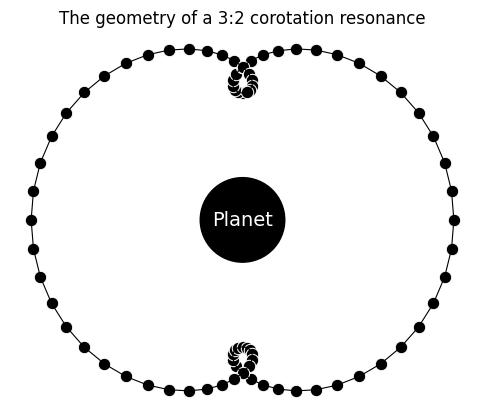

In [63]:
x = [x[1] for x in rotlist]
y = [x[0] for x in rotlist]

fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x=x, y=y, color='black', s=80, ax=ax)

ax.add_patch(plt.Circle((0,0), radius=0.25, color='black'))

ax.set_title('The geometry of a 3:2 corotation resonance')
ax.text(0, 0, 'Planet', ha='center', va='center', fontsize=14, color='white')
ax.plot(x,y,  color = 'black', linewidth = 0.8)

ax.set_aspect('equal')
ax.axis('off')

plt.show()

<h3> Section 10.3.2: Perturbations in Eccentricity and Lindblad Resonances </h3>     

<p> Other important resonances are the Lindblad resonances, which are those where the pattern speed is equal to the radial frequency of the particle <b>(Eq. 10.11)</b>: 

$$m(n-\Omega_p)= \pm \kappa$$  
    
where the upper signs correspond to the perturbing satellite inside the location of the resonance (internal lindblad resonance ILR), and the lower signs are for the moon outside the resonance (lindblad external resonance OLR).

In this type of resonance, it is expected that the satellite will eventually excite the particle's motion, making it increasingly eccentric.

The most important characteristic of these resonances is that the orbits of the particles are closed for very small inclinations.  
    
    
To help understand the mechanism of a Lindblad resonance, <b> Equation 10.19</b> is introduced, which describes the paths, or streamlines:  
    
$$r= a[1 - e\cos(m\theta_c-constant)]$$ 
    
In the code that we develop below, we reproduce <i>Fig. 10.8.</i>, which shows the resulting streamlines for the cases $m = 0$ (a circle), $m = 1$ (a keplerian ellipse), $m = 2$ (a centred ellipse), and $m = 7$ (a seven-lobed curve). For each case we have chosen a phase constant equal to zero.
    
</p> 

In [64]:
def r(a, e, m, θc):
    return a*(1 - e*np.cos(m*θc))

In [65]:
def StreamLine(m, e):
    a = 1
    θc = np.linspace(0, 2*np.pi, 100)
    x = r(a, e, m, θc) * np.cos(θc)
    y = r(a, e, m, θc) * np.sin(θc)
    return x,y

<Figure size 640x480 with 0 Axes>

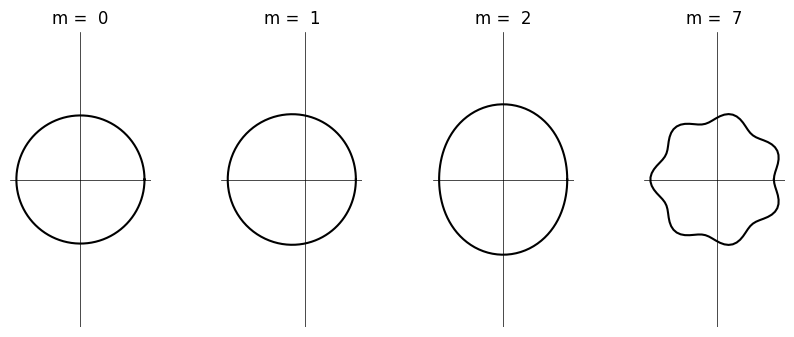

In [67]:
plt.figure()
plt.subplots(figsize=(10,5))

count = 1
for i in [0, 1, 2, 7]:
    
    if i==1:
        e = 0.2
    else:
        e = 0.08
        
    plt.subplot(1,4,count)
    plt.plot(StreamLine(i, e)[0], StreamLine(i, e)[1], color = 'black')
    
    plt.axhline(y = 0, color = 'black', linewidth = 0.5)
    plt.axvline(x = 0, color = 'black',  linewidth = 0.5)

    plt.subplots_adjust(top = 0.7, wspace = 0.5)
    plt.title("m =  {}".format(i))
    plt.axis('equal')
    plt.axis('off')
    
    count += 1
    
warnings.filterwarnings("ignore",category=matplotlib.cbook.MatplotlibDeprecationWarning)

<p> Now, to reproduce <i>Fig. 10.9.</i>, which illustrates the stremas lines for the Lindblad 7:6 resonance, we define a function that produces sine waves for the region outside and inside the resonance:
</p>

In [68]:
def radout(a, amp, n, theta):
    return a - amp * np.sin(theta * n)

In [69]:
def radin(a, amp, n, theta):
    return a + amp * np.sin(theta * n)

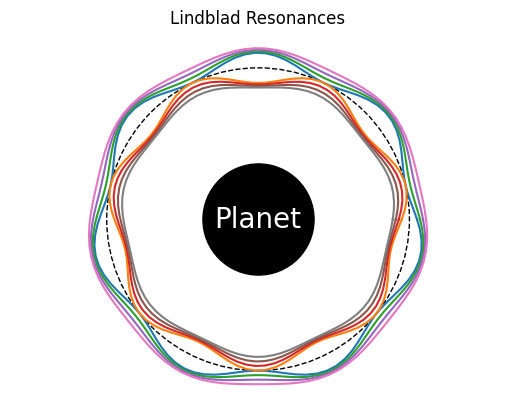

In [70]:
outerc = []
innerc = []

for i in range(4):
    theta = np.linspace(0, 2*np.pi, 100)
    outer_x = radout(1.05 + 0.02*i, 0.05 - 0.01*i, 7, theta) * np.cos(theta)
    outer_y = radout(1.05 + 0.02*i, 0.05 - 0.01*i, 7, theta) * np.sin(theta)
    inner_x = radin(0.95 - 0.02*i, 0.05 - 0.01*i, 7, theta) * np.cos(theta)
    inner_y = radin(0.95 - 0.02*i, 0.05 - 0.01*i, 7, theta) * np.sin(theta)
    outerc.append((outer_x, outer_y))
    innerc.append((inner_x, inner_y))

fig, ax = plt.subplots()
ax.set_aspect('equal')

for i in range(4):
    plt.plot(outerc[i][0], outerc[i][1])
    plt.plot(innerc[i][0], innerc[i][1])
    

ax.add_patch(plt.Circle((0, 0), 1, linestyle='dashed', edgecolor='black', facecolor='none'))
ax.plot(0,0, 'o', color = 'black', markersize = 80)
ax.text(0, 0, "Planet", fontsize=20, color='white', ha='center', va='center')

plt.title('Lindblad Resonances')
plt.axis('equal')
plt.axis('off')

plt.show()

<p> In this graph the curves denote the streamlines of particle orbits on either side of exact resonance, denoted by the dashed circle.   

The following graph illustrates the internal Lindblad resonances (ILR, corresponding to <b>+</b>$\kappa$) and the external Lindblad resonances (OLR, corresponding to <b>-</b>$\kappa$)</p>

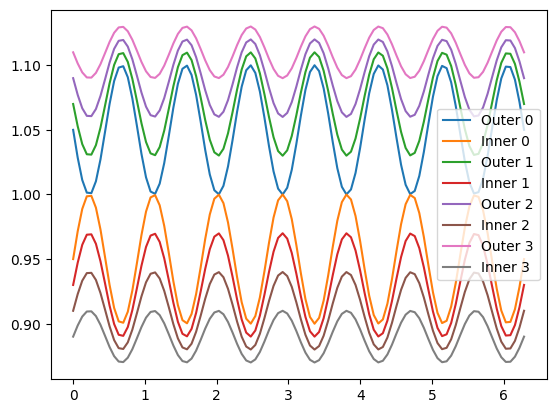

In [71]:
outer = []
inner = []

for i in range(0,4):
    theta = np.linspace(0, 2 * np.pi, 100)
    outer.append(radout(1.05 + 0.02*i, 0.05 - 0.01*i, 7, theta))
    inner.append(radin(0.95 - 0.02*i, 0.05 - 0.01*i, 7, theta))

for i in range(0,4):
    plt.plot(theta, outer[i], label=f"Outer {i}")
    plt.plot(theta, inner[i], label=f"Inner {i}")

plt.legend()
plt.show()

<h2>  Section 10.4: Density Waves and Bending Waves </h2>   

<p>  Density Waves are phenomena that occur in planetary ring systems, such as Saturn's ring system. These waves are formed due to the gravitational interaction between the individual particles that make up the rings and the gravitational effects of the planet's satellites.

Density Waves occur when a small perturbation in the particle density of the ring generates a wave propagating through the ring. These density waves can form due to the presence of a nearby satellite that exerts a periodic gravitational influence on the ring particles. As the wave propagates, it causes periodic variations in the density of the ring, which in turn can result in spiral-shaped structures or crests and troughs in the ring. 

Next we will develop the code to arrive at <i> Fig. 10.11.a</i> which shows a density wave launched at the inner Lindblad resonance (ILR) 2:1 with an external satellite.  

First, the radius is defined as a function of the semimajor axis, the eccentricity, the periapsis length and the true anomaly:</p>

In [72]:
def r(a, e, pi, f):
    return a * (1 - e**2) / (1 + e * np.cos(f + pi))

<p> Then, a function is defined that uses the Newton-Raphson method to solve Kepler's equation and find the eccentric anomaly given a value of mean anomaly and eccentricity.
</p>

In [73]:
def ksolve(ma, e):
    def f(ea, ma):
        return ea - e*np.sin(ea) - ma 
    ea_guess = ma
    ea_sol = fsolve(f, ea_guess, args=(ma,))
    return ea_sol[0]

<p> Next, we create a function that computes <i>(x,y)</i> for a value of the mean anomaly.
</p>

In [74]:
def position(ma, a, e, pi):
    ea = ksolve(ma, e)
    x = a*(np.cos(ea)-e)
    y = a*np.sqrt(1-e**2)*np.sin(ea)
    rotation_matrix = np.array([[np.cos(pi), np.sin(pi)], [-np.sin(pi), np.cos(pi)]])
    return rotation_matrix.dot([x, y])

In [75]:
p = 1/2
e = 0.1

<p> Finally, we plot eleven orbits in the rotating frame, all with the same eccentricity, increasing the semimajor axis and decreasing the periapsis length.
</p>

In [76]:
plot = {}
for i in range(11):
    pi = -i * np.pi / 12
    a = 1.0 + i * 0.15
    rotlist = []
    for t in np.arange(0, 5*np.pi, np.pi / 20):
        posvec = position(t, a, e, pi)
        f = np.arctan2(posvec[1], posvec[0])
        rad = np.sqrt(posvec[0]**2 + posvec[1]**2)
        theta = p*t
        psi = theta - f
        blip = [rad * np.cos(psi), rad * np.sin(psi)]
        rotlist.append(blip)
    plot[i] = rotlist

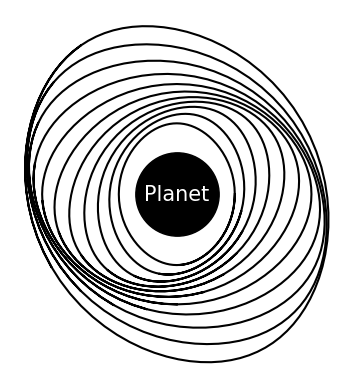

In [77]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

for i in range(11):
    ax.plot(*zip(*plot[i]), '-', color='black')

ax.plot(0,0, 'o', color = 'black', markersize = 60)
ax.text(0, 0, "Planet", fontsize=15, color='white', ha='center', va='center')

ax.set_axis_off()

plt.show()

<p> 

The creation of a spiral-density wave begins when a two-armed spiral wave is excited at the 2:1 resonance with the exterior moon. The ovals represent particle paths as seen in the frame rotating with the orbiting satellite. Their long axes become less and less well aligned with the satellite’s direction at greater distances from the resonances. The clustering that occurs in the orbital paths induces coherent oscillations in neighboring particles as they drift past by Keplerian shear.

</p> 

<h1> Annex </h1> 

<h2> Appendix A </h2> 

<h3> Table A.8. The ring system of Jupiter. </h3>

In [78]:
jupiter_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,halo,89400,123000
1,main,123000,128940
2,gossamer,128940,242000


<h3> Table A.10. The ring system of Saturn. </h3>

In [79]:
saturn_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,D,66900,74658
1,C,74658,91975
2,B,91975,117507
3,A,122340,136780
4,F,140219,140269
5,G,166000,173200
6,E,180000,480000


<h3> Table A.12. The ring system of Uranus. </h3>

In [80]:
uranus_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,6,41837,41852.0
1,5,42334,42236.0
2,4,42571,42573.5
3,α,44718,44725.0
4,β,45661,45669.0
5,η,47176,47177.6
6,γ,47627,47629.5
7,δ,48300,48305.0
8,λ,50024,50026.0
9,ε,51149,51265.0


<h3> Table A.14. The ring system of Neptune. </h3>

In [81]:
neptune_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,Galle,42000.00,44000.00
1,Le Verrier,53200.00,53299.00
2,Lassell,53200.00,57200.00
3,Adams,62932.57,62947.57


<p> You can check the  <b>id</b> of each body in the following tables: </p>   



<div style="overflow-x: auto;">
    <table style="border-collapse: collapse;">
        <thead>
            <tr>
                   <th class="tg-baqh" colspan="4" style="text-align: center;"><span style="font weight:bold">599</span>&nbsp;&nbsp;Jupiter</th>            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>501</b> Io</td>
                <td style="border: 1px solid black; padding: 10px;"><b>502</b> Europa</td>
                <td style="border: 1px solid black; padding: 10px;"><b>503</b> Ganymede</td>
                <td style="border: 1px solid black; padding: 10px;"><b>504</b> Callisto</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>505</b> Amalthea</td>
                <td style="border: 1px solid black; padding: 10px;"><b>506</b> Himalia</td>
                <td style="border: 1px solid black; padding: 10px;"><b>507</b> Elara</td>
                <td style="border: 1px solid black; padding: 10px;"><b>508</b> Pasiphae</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>509</b> Sinope</td>
                <td style="border: 1px solid black; padding: 10px;"><b>510</b> Lysithea</td>
                <td style="border: 1px solid black; padding: 10px;"><b>511</b> Carme</td>
                <td style="border: 1px solid black; padding: 10px;"><b>512</b> Ananke</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>513</b> Leda</td>
                <td style="border: 1px solid black; padding: 10px;"><b>514</b> Thebe</td>
                <td style="border: 1px solid black; padding: 10px;"><b>515</b> Adrastea</td>
                <td style="border: 1px solid black; padding: 10px;"><b>516</b> Metis</td>
            </tr>
        </tbody>
    </table>
</div>

<div style="overflow-x: auto;">
    <table style="border-collapse: collapse;">
        <thead>
            <tr>
                   <th class="tg-baqh" colspan="4" style="text-align: center;"><span style="font weight:bold">699 </span>&nbsp;&nbsp;Saturn</th>            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>601</b> Mimas</td>
                <td style="border: 1px solid black; padding: 10px;"><b>602</b> Enceladus</td>
                <td style="border: 1px solid black; padding: 10px;"><b>603</b> Tethys</td>
                <td style="border: 1px solid black; padding: 10px;"><b>604</b> Dione</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>605</b> Rhea</td>
                <td style="border: 1px solid black; padding: 10px;"><b>606</b> Titan</td>
                <td style="border: 1px solid black; padding: 10px;"><b>607</b> Hyperion</td>
                <td style="border: 1px solid black; padding: 10px;"><b>608</b> Iapetus</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>609</b> Phoebe</td>
                <td style="border: 1px solid black; padding: 10px;"><b>610</b> Janus</td>
                <td style="border: 1px solid black; padding: 10px;"><b>611</b> Epimetheus</td>
                <td style="border: 1px solid black; padding: 10px;"><b>612</b> Helene</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>613</b> Telesto</td>
                <td style="border: 1px solid black; padding: 10px;"><b>614</b> Calypso</td>
                <td style="border: 1px solid black; padding: 10px;"><b>615</b> Atlas</td>
                <td style="border: 1px solid black; padding: 10px;"><b>616</b> Prometheus</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>617</b> Pandora</td>
                <td style="border: 1px solid black; padding: 10px;"><b>618</b> Pan</td>
                <td style="border: 1px solid black; padding: 10px;"><b>632</b> Methone</td>
                <td style="border: 1px solid black; padding: 10px;"><b>633</b> Pallene</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>634</b> Polydeuces</td>
                <td style="border: 1px solid black; padding: 10px;"><b>635</b> Daphnis</td>
                <td style="border: 1px solid black; padding: 10px;"><b>649</b> Anthe</td>
                <td style="border: 1px solid black; padding: 10px;"><b>653</b> Aegaeon</td>
            </tr>
        </tbody>
    </table>
</div>

<div style="overflow-x: auto;">
    <table style="border-collapse: collapse;">
        <thead>
            <tr>
                   <th class="tg-baqh" colspan="4" style="text-align: center;"><span style="font weight:bold">799</span>&nbsp;&nbsp;Uranus</th>            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>701</b> Ariel</td>
                <td style="border: 1px solid black; padding: 10px;"><b>702</b> Umbriel</td>
                <td style="border: 1px solid black; padding: 10px;"><b>703</b> Titania</td>
                <td style="border: 1px solid black; padding: 10px;"><b>704</b> Oberon</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>705</b> Miranda</td>
                <td style="border: 1px solid black; padding: 10px;"><b>706</b> Cordelia</td>
                <td style="border: 1px solid black; padding: 10px;"><b>707</b> Ophelia</td>
                <td style="border: 1px solid black; padding: 10px;"><b>708</b> Bianca</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>709</b> Cressida</td>
                <td style="border: 1px solid black; padding: 10px;"><b>710</b> Desdemona</td>
                <td style="border: 1px solid black; padding: 10px;"><b>711</b> Juliet</td>
                <td style="border: 1px solid black; padding: 10px;"><b>712</b> Portia</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>713</b> Rosalind</td>
                <td style="border: 1px solid black; padding: 10px;"><b>714</b> Belinda</td>
                <td style="border: 1px solid black; padding: 10px;"><b>715</b> Puck</td>
                <td style="border: 1px solid black; padding: 10px;"><b> </b> </td>
            </tr>
        </tbody>
    </table>
</div>

<div style="overflow-x: auto;">
    <table style="border-collapse: collapse;">
        <thead>
            <tr>
                   <th class="tg-baqh" colspan="4" style="text-align: center;"><span style="font weight:bold">899</span>&nbsp;&nbsp;Neptune</th>            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>801</b> Triton</td>
                <td style="border: 1px solid black; padding: 10px;"><b>802</b> Nereid</td>
                <td style="border: 1px solid black; padding: 10px;"><b>803</b> Naiad</td>
                <td style="border: 1px solid black; padding: 10px;"><b>804</b> Thalassa</td>
            </tr>
            <tr>
                <td style="border: 1px solid black; padding: 10px;"><b>805</b> Despina</td>
                <td style="border: 1px solid black; padding: 10px;"><b>806</b> Galatea</td>
                <td style="border: 1px solid black; padding: 10px;"><b>807</b> Larissa</td>
                <td style="border: 1px solid black; padding: 10px;"><b>808</b> Proteus</td>
            </tr>
        </tbody>
    </table>
</div>

<h1> References </h1>

1. <a id="(Burns et al. 1985)"></a>
<p>Burns, J. A., Schaffer, L. E., Greenberg, R. J., &amp; Showalter, M. (1985). Lorentz resonances and the structure of the jovian ring, <i>Nature</i>, <i>316</i>, 115–119.</p>

2.  <a id="(Consolmagno et al. 1983)"></a>
<p> Consolmagno, G. J. (1983). Lorentz forces on the dust in Jupiter’s ring, J. <i>Geophys.</i> <i>Res.</i>, 88, 5607–5612.</p>

3.  <a id="(Tiscareno et al. 2018)"></a>
<p> Tiscareno, M. S. (2018). Planetary Ring Systems: Properties, Structure, and Evolution. <i>Cambridge University Press,</i> 15. </p> 


